In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [14]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")
#merged_data_df = pd.read_csv("Resources/merged_output.csv")
#merged_data_df.head()
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [15]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, 
#### standard deviation for each pollutants verses county

#### Calculations for SO2 AQI:

In [16]:
# Group by County and aggregate mean, median, variance, standard deviation of the SO2 AQI (Sulphur dioxide Air Quality Index) for each County.
stat_so2_df = data_df.groupby(['County', 'Year']).agg({'SO2 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_so2_df.head()

SO2 AQI                                           
                     amax amin      mean median        var       std
County       Year                                                   
Alameda      2007    20.0  0.0  5.416667    3.0  29.099291  5.394376
             2008    20.0  0.0  3.701657    3.0   9.980025  3.159118
             2009    23.0  0.0  3.443836    3.0  11.001642  3.316872
             2010    13.0  0.0  2.446475    1.0   5.361184  2.315423
Contra Costa 2006    62.0  0.0  6.699315    4.0  43.342925  6.583534

In [17]:
# Rename columns for mean, median, variance, standard deviation of the SO2 AQI (Sulphur dioxide Air Quality Index) for each County.

stat_so2_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']

In [18]:
# Resetting the Index

so2_df = stat_so2_df.reset_index()
so2_df.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2007,20.0,0.0,5.416667,3.0,29.099291,5.394376
1,Alameda,2008,20.0,0.0,3.701657,3.0,9.980025,3.159118
2,Alameda,2009,23.0,0.0,3.443836,3.0,11.001642,3.316872
3,Alameda,2010,13.0,0.0,2.446475,1.0,5.361184,2.315423
4,Contra Costa,2006,62.0,0.0,6.699315,4.0,43.342925,6.583534


In [19]:
grouped_df = so2_df.groupby("County")
max_so2_aqi = grouped_df.max()
max_so2_aqi = max_so2_aqi.reset_index()
max_so2_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2010,23.0,0.0,5.416667,3.0,29.099291,5.394376
1,Contra Costa,2010,65.0,0.0,6.699315,4.0,43.342925,6.583534
2,Fresno,2010,34.0,0.0,3.424658,3.0,8.760091,2.959745
3,Humboldt,2010,37.0,0.0,2.181818,1.0,76.090909,8.723010
4,Imperial,2010,153.0,0.0,4.151934,3.0,154.867617,12.444582


In [23]:
# Combining two columns
max_so2_aqi["County_Year"] = max_so2_aqi["County"] + "-" + max_so2_aqi["Year"]
max_so2_aqi

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,County_Year
0,Alameda,2010,23.0,0.0,5.416667,3.0,29.099291,5.394376,Alameda-2010
1,Contra Costa,2010,65.0,0.0,6.699315,4.0,43.342925,6.583534,Contra Costa-2010
2,Fresno,2010,34.0,0.0,3.424658,3.0,8.760091,2.959745,Fresno-2010
3,Humboldt,2010,37.0,0.0,2.181818,1.0,76.090909,8.723010,Humboldt-2010
4,Imperial,2010,153.0,0.0,4.151934,3.0,154.867617,12.444582,Imperial-2010
5,Los Angeles,2010,106.0,0.0,5.674386,4.0,34.608508,5.882900,Los Angeles-2010
6,Orange,2010,41.0,0.0,4.151862,3.0,10.632559,3.260760,Orange-2010
7,Riverside,2010,23.0,1.0,3.264798,3.0,6.341629,2.518259,Riverside-2010
8,Sacramento,2010,24.0,0.0,2.651438,3.0,4.410155,2.100037,Sacramento-2010
9,San Bernardino,2010,71.0,0.0,3.862637,3.0,15.007240,3.873918,San Bernardino-2010


#### Visual Representation:

In [21]:
# Converting into list for plotting

county = list(max_so2_aqi['County_Year'])
so2_aqi = list(max_so2_aqi['Mean'])


#### Creating scatter plot for Counties Vs. Average Nitrogen_dioxide Air Quality Index

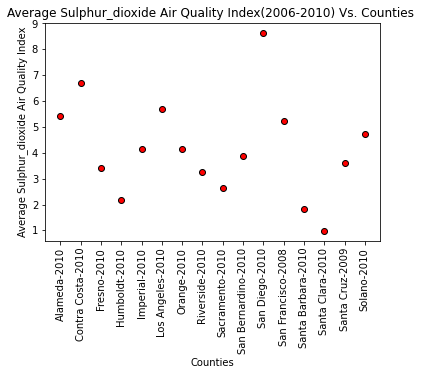

<Figure size 1440x1152 with 0 Axes>

In [31]:
# Creating plots for Counties Vs. Average Sulphur_dioxide Air Quality Index

plt.scatter(county, so2_aqi, marker="o", facecolors="red", edgecolors="black")



# Create a title, x label, and y label for our chart
plt.title("Average Sulphur_dioxide Air Quality Index(2006-2010) Vs. Counties ")
plt.xlabel("Counties")
plt.ylabel("Average Sulphur_dioxide Air Quality Index")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.

labels = county
plt.xticks(county, labels, rotation='vertical', fontsize=10)


plt.figure(figsize=(20,16))

plt.tight_layout()

plt.savefig('mq_charts/county_avg_so2aqi.png')

plt.show()




#### Primary National Ambient Air Quality Standard (NAAQS) for Sulfur Dioxide ... The existing standard, established in 2010, is 75 parts per billion 

#### Average Sulphur-dioxide Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'San Diego' county has the  maximum of 8.631259 ppb